Name: Jonathen Smith

Class: Data Science Tools 1

Assignment: Final Project

Github repository: https://github.com/Ungarmaxx/TOOL1_FINAL_PROJECT

Dataset: csv downloaded from here https://www.scq.ubc.ca/so-much-candy-data-seriously/

Csv file download: https://www.scq.ubc.ca/wp-content/uploads/2017/10/candyhierarchy2017.csv

Why this Dataset?
- This Dataset looked like a handful to clean and go through. I always wanted to try my hand at analysing a survey, and this one definitely looked fun to tackle.

Research Question:
- I wanted to know which candies were the most liked and the most hated depending on the age group and gender of the person.
- I wanted to see the correlations between different candies and see which candies are related to eachother.
- My outputs are a heatmap, a correlation matrix, and count plots for the various sexes and age ranges

Literature Review:
- There isn't much in the way of literature, since these are mostly surveys for candy stores and companies to look at.
- The other survey results I've found are pretty consistant with my results:
    - In general Reeces Peanut Butter Cups are the most well liked
    - Raisins were the worst in my data, but that might be because the other surveys didn't consider them as candy while I did. That's definitely something to keep in my in the future.
    - Other disliked candies such as Sourpatch Kids and Black Licorice were mine and other surveys as well.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

> Let's read in and take a look at our Candy dataset

In [2]:
df = pd.read_csv('candyhierarchy2017.csv', encoding = "ISO-8859-1")

In [3]:
df.head(5)

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,...,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
0,90258773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,...,NaN,Bottom line is Twix is really the only candy w...,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(84, 25)"
2,90272829,NaN,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,90272840,No,Male,40,us,or,MEH,DESPAIR,JOY,MEH,...,NaN,Raisins can go to hell,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(75, 23)"
4,90272841,No,Male,23,usa,exton pa,JOY,DESPAIR,JOY,DESPAIR,...,NaN,NaN,White and gold,NaN,Friday,NaN,1.0,NaN,NaN,"(70, 10)"


> Looks like there are a lot of different columns for candy. Lets try to take a look at all of them:

In [4]:
print(df.columns.tolist())

['Internal ID', 'Q1: GOING OUT?', 'Q2: GENDER', 'Q3: AGE', 'Q4: COUNTRY', 'Q5: STATE, PROVINCE, COUNTY, ETC', 'Q6 | 100 Grand Bar', 'Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)', 'Q6 | Any full-sized candy bar', 'Q6 | Black Jacks', 'Q6 | Bonkers (the candy)', 'Q6 | Bonkers (the board game)', 'Q6 | Bottle Caps', "Q6 | Box'o'Raisins", 'Q6 | Broken glow stick', 'Q6 | Butterfinger', 'Q6 | Cadbury Creme Eggs', 'Q6 | Candy Corn', 'Q6 | Candy that is clearly just the stuff given out for free at restaurants', 'Q6 | Caramellos', 'Q6 | Cash, or other forms of legal tender', 'Q6 | Chardonnay', 'Q6 | Chick-o-Sticks (we donÕt know what that is)', 'Q6 | Chiclets', 'Q6 | Coffee Crisp', 'Q6 | Creepy Religious comics/Chick Tracts', 'Q6 | Dental paraphenalia', 'Q6 | Dots', 'Q6 | Dove Bars', 'Q6 | Fuzzy Peaches', 'Q6 | Generic Brand Acetaminophen', 'Q6 | Glow sticks', 'Q6 | Goo Goo Clusters', "Q6 | Good N' Plenty", 'Q6 | Gum from baseball cards', 'Q6 | Gummy Bea

In [5]:
# make all columns lowercase
df = df.rename(str.lower, axis='columns')

In [6]:
print(df.columns.tolist())

['internal id', 'q1: going out?', 'q2: gender', 'q3: age', 'q4: country', 'q5: state, province, county, etc', 'q6 | 100 grand bar', 'q6 | anonymous brown globs that come in black and orange wrappers\t(a.k.a. mary janes)', 'q6 | any full-sized candy bar', 'q6 | black jacks', 'q6 | bonkers (the candy)', 'q6 | bonkers (the board game)', 'q6 | bottle caps', "q6 | box'o'raisins", 'q6 | broken glow stick', 'q6 | butterfinger', 'q6 | cadbury creme eggs', 'q6 | candy corn', 'q6 | candy that is clearly just the stuff given out for free at restaurants', 'q6 | caramellos', 'q6 | cash, or other forms of legal tender', 'q6 | chardonnay', 'q6 | chick-o-sticks (we donõt know what that is)', 'q6 | chiclets', 'q6 | coffee crisp', 'q6 | creepy religious comics/chick tracts', 'q6 | dental paraphenalia', 'q6 | dots', 'q6 | dove bars', 'q6 | fuzzy peaches', 'q6 | generic brand acetaminophen', 'q6 | glow sticks', 'q6 | goo goo clusters', "q6 | good n' plenty", 'q6 | gum from baseball cards', 'q6 | gummy bea

> I made all of the columns lowercase and I renamed a few columns for ease of use and readability

In [7]:
# Renaming columns
df = df.rename(columns={'internal id':'id', 'q1: going out?': 'going_out', 'q2: gender': 'gender', 'q3: age': 'age', 
                   'q4: country' : 'country', 'q5: state, province, county, etc' : 'location', 
                   'q11: day' : 'day'})
df.head(0)

,id,going_out,gender,age,country,location,q6 | 100 grand bar,q6 | anonymous brown globs that come in black and orange wrappers\t(a.k.a. mary janes),q6 | any full-sized candy bar,q6 | black jacks,...,q8: despair other,q9: other comments,q10: dress,unnamed: 113,day,q12: media [daily dish],q12: media [science],q12: media [espn],q12: media [yahoo],"click coordinates (x, y)"


> I decided to remove these columns, since I won't be using them for my analysis.

In [8]:
# dropping columns that won't be used for analysis
df = df.drop(columns=['q7: joy other', 'q8: despair other', 'q9: other comments',
                      'q10: dress', 'unnamed: 113', 'q12: media [daily dish]', 
                      'q12: media [science]', 'q12: media [espn]', 
                      'q12: media [yahoo]', 'click coordinates (x, y)'])
df.head(0)

,id,going_out,gender,age,country,location,q6 | 100 grand bar,q6 | anonymous brown globs that come in black and orange wrappers\t(a.k.a. mary janes),q6 | any full-sized candy bar,q6 | black jacks,...,q6 | tolberone something or other,q6 | trail mix,q6 | twix,"q6 | vials of pure high fructose corn syrup, for main-lining into your vein",q6 | vicodin,q6 | whatchamacallit bars,q6 | white bread,q6 | whole wheat anything,q6 | york peppermint patties,day


> I decided to drop these columns as well since they have nothing to do with candy.

In [9]:
# removing columns of stuff not candy related, or that were too generic
df = df.drop(columns=['q6 | any full-sized candy bar',
 'q6 | broken glow stick',
 'q6 | bonkers (the board game)',
 'q6 | candy that is clearly just the stuff given out for free at restaurants',
 'q6 | cash, or other forms of legal tender',
 'q6 | chardonnay',
 'q6 | creepy religious comics/chick tracts',
 'q6 | dental paraphenalia',
 'q6 | generic brand acetaminophen',
 'q6 | glow sticks',
 'q6 | gum from baseball cards',
 'q6 | healthy fruit',
 'q6 | hugs (actual physical hugs)',
 'q6 | kale smoothie',
 "q6 | blue m&m's",
 "q6 | red m&m's",
 "q6 | green party m&m's",
 "q6 | independent m&m's",
 "q6 | abstained from m&m'ing.",
 'q6 | minibags of chips',
 'q6 | mint juleps',
 'q6 | pencils',
 'q6 | real housewives of orange county season 9 blue-ray',
 'q6 | sandwich-sized bags filled with booberry crunch',
 'q6 | senior mints',
 'q6 | smarties (commonwealth)',
 'q6 | spotted dick',
 'q6 | those odd marshmallow circus peanut things',
 'q6 | vials of pure high fructose corn syrup, for main-lining into your vein',
 'q6 | vicodin',
 'q6 | white bread',
 'q6 | whole wheat anything'])

In [10]:
#rechecking columns to ensure everything is candy related
print(df.columns.tolist())

['id', 'going_out', 'gender', 'age', 'country', 'location', 'q6 | 100 grand bar', 'q6 | anonymous brown globs that come in black and orange wrappers\t(a.k.a. mary janes)', 'q6 | black jacks', 'q6 | bonkers (the candy)', 'q6 | bottle caps', "q6 | box'o'raisins", 'q6 | butterfinger', 'q6 | cadbury creme eggs', 'q6 | candy corn', 'q6 | caramellos', 'q6 | chick-o-sticks (we donõt know what that is)', 'q6 | chiclets', 'q6 | coffee crisp', 'q6 | dots', 'q6 | dove bars', 'q6 | fuzzy peaches', 'q6 | goo goo clusters', "q6 | good n' plenty", 'q6 | gummy bears straight up', 'q6 | hard candy', 'q6 | heath bar', "q6 | hershey's dark chocolate", 'q6 | hersheyõs milk chocolate', "q6 | hershey's kisses", 'q6 | jolly rancher (bad flavor)', 'q6 | jolly ranchers (good flavor)', 'q6 | joyjoy (mit iodine!)', 'q6 | junior mints', 'q6 | kinder happy hippo', 'q6 | kit kat', 'q6 | laffytaffy', 'q6 | lemonheads', 'q6 | licorice (not black)', 'q6 | licorice (yes black)', 'q6 | lindt truffle', 'q6 | lollipops', 

> I checked for duplicates as well, to ensure no survey was entered more than once, but that wasn't the case.

In [11]:
# checking for duplicate entries
df[df.duplicated()]

,id,going_out,gender,age,country,location,q6 | 100 grand bar,q6 | anonymous brown globs that come in black and orange wrappers\t(a.k.a. mary janes),q6 | black jacks,q6 | bonkers (the candy),...,q6 | sweetums (a friend to diabetes),q6 | take 5,q6 | tic tacs,q6 | three musketeers,q6 | tolberone something or other,q6 | trail mix,q6 | twix,q6 | whatchamacallit bars,q6 | york peppermint patties,day


> Next I wanted to rename all of the columns into something that looks better. Some were too long, and the Question number wasn't important here.

In [12]:
df = df.rename(columns={'q6 | 100 grand bar': '100_grand',
                   'q6 | anonymous brown globs that come in black and orange wrappers\t(a.k.a. mary janes)': 'mary_jane',
                   'q6 | black jacks': 'black_jacks',
                   'q6 | bonkers (the candy)': 'bonkers',
                   'q6 | bottle caps': 'bottle_caps', 
                   "q6 | box'o'raisins": 'raisins',
                   'q6 | butterfinger' : 'butterfinger',
                   'q6 | cadbury creme eggs': 'cadbury_creme_eggs',
                   'q6 | candy corn' : 'candy_corn',
                   'q6 | caramellos' : 'caramellos', 
                   'q6 | chick-o-sticks (we donõt know what that is)': 'chick_o_sticks',
                   'q6 | chiclets': 'chiclets', 
                   'q6 | coffee crisp' : 'coffee_crisp',
                   'q6 | dots': 'dots',
                   'q6 | dove bars': 'dove_bars', 
                   'q6 | fuzzy peaches': 'fuzzy_peaches',
                   'q6 | goo goo clusters': 'goo_goo_clusters',
                   "q6 | good n' plenty": 'good_and_plenty',
                   'q6 | gummy bears straight up' : 'gummy_bears',
                   'q6 | hard candy' : 'hard_candy', 
                   'q6 | heath bar': 'heath_bar',
                   "q6 | hershey's dark chocolate": 'hersheys_dark_chocolate', 
                   'q6 | hersheyõs milk chocolate': 'hersheys_milk_chocolate',
                   "q6 | hershey's kisses" : 'hersheys_kisses',
                   'q6 | jolly rancher (bad flavor)' : 'jolly_bad',
                   'q6 | jolly ranchers (good flavor)' : 'jolly_good',
                   'q6 | joyjoy (mit iodine!)' : 'joyjoy',
                   'q6 | junior mints': 'junior_mints', 
                   'q6 | kinder happy hippo' : 'kinder_happy_hippo',
                   'q6 | kit kat' : 'kit_kat',
                   'q6 | laffytaffy':'laffytaffy',
                   'q6 | lemonheads': 'lemonheads',
                   'q6 | licorice (not black)' : 'licorice',
                   'q6 | licorice (yes black)' : 'licorice_black',
                   'q6 | lindt truffle' : 'lindt_truffle',
                   'q6 | lollipops' : 'lollipops',
                   'q6 | mars' : 'mars',
                   'q6 | maynards' : 'maynards',
                   'q6 | mike and ike' : 'mike_and_ike',
                   'q6 | milk duds' : 'milk_duds',
                   'q6 | milky way' : 'milky_way',
                   'q6 | regular m&ms' : 'm&ms',
                   'q6 | peanut m&mõs' : 'm&ms_peanut',
                   'q6 | mint kisses' : 'mint_kisses', 
                   'q6 | mr. goodbar' : 'mr_goodbar',
                   'q6 | necco wafers' : 'necco_wafers',
                   'q6 | nerds' : 'nerds',
                   'q6 | nestle crunch' : 'nestle_crunch', 
                   "q6 | now'n'laters" : 'now_and_laters', 
                   'q6 | peeps' : 'peeps',
                   'q6 | pixy stix' : 'pixy_sticks',
                   'q6 | reeseõs peanut butter cups' : 'reeses_peanut_butter_cups',
                   "q6 | reese's pieces": 'reeses_pieces',
                   'q6 | reggie jackson bar' : 'reggie_bar',
                   'q6 | rolos' : 'rolos', 
                   'q6 | skittles' : 'skittles',
                   'q6 | smarties (american)' : 'smarties', 
                   'q6 | snickers' : 'snickers', 
                   'q6 | sourpatch kids (i.e. abominations of nature)' : 'sourpatch_kids',
                   'q6 | starburst' : 'starburst', 
                   'q6 | sweet tarts' : 'sweet_tarts',
                   'q6 | swedish fish' : 'swedish_fish', 
                   'q6 | sweetums (a friend to diabetes)': 'sweetums',
                   'q6 | take 5' : 'take_5', 
                   'q6 | tic tacs' : 'tic_tacs',
                   'q6 | three musketeers' : 'three_musketeers',
                   'q6 | tolberone something or other' : 'tolberone',
                   'q6 | trail mix' : 'trail_mix',
                   'q6 | twix': 'twix', 
                   'q6 | whatchamacallit bars': 'whatchamacallit_bars' , 
                   'q6 | york peppermint patties' : 'york_peppermint_patties'
                       })

In [13]:
# Checking to make sure everything changed correctly
print(df.columns.tolist())

['id', 'going_out', 'gender', 'age', 'country', 'location', '100_grand', 'mary_jane', 'black_jacks', 'bonkers', 'bottle_caps', 'raisins', 'butterfinger', 'cadbury_creme_eggs', 'candy_corn', 'caramellos', 'chick_o_sticks', 'chiclets', 'coffee_crisp', 'dots', 'dove_bars', 'fuzzy_peaches', 'goo_goo_clusters', 'good_and_plenty', 'gummy_bears', 'hard_candy', 'heath_bar', 'hersheys_dark_chocolate', 'hersheys_milk_chocolate', 'hersheys_kisses', 'jolly_bad', 'jolly_good', 'joyjoy', 'junior_mints', 'kinder_happy_hippo', 'kit_kat', 'laffytaffy', 'lemonheads', 'licorice', 'licorice_black', 'lindt_truffle', 'lollipops', 'mars', 'maynards', 'mike_and_ike', 'milk_duds', 'milky_way', 'm&ms', 'm&ms_peanut', 'mint_kisses', 'mr_goodbar', 'necco_wafers', 'nerds', 'nestle_crunch', 'now_and_laters', 'peeps', 'pixy_sticks', 'reeses_peanut_butter_cups', 'reeses_pieces', 'reggie_bar', 'rolos', 'skittles', 'smarties', 'snickers', 'sourpatch_kids', 'starburst', 'sweet_tarts', 'swedish_fish', 'sweetums', 'take_5

> I want to know which candy people like based off of gender and age, so I needed to make 2 new data sets so that we can remove any N/A or outliers.

> A lot of values in the age column were just strings or words. I decided to change all string ages to 0 and then convert the whole column to an int type.

In [14]:
clean_df = df.dropna(subset=['age', 'gender'])

In [15]:
clean_df.loc[:, 'age'] = pd.to_numeric(clean_df.age.astype(str).str.replace(',',''), errors='coerce').fillna(0).astype(int)

C:\Users\reaso\Anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


> I decided to limit the age range from 10 to 99. I felt that someone less than age 10 wouldn't be able to correctly fill out such a long survey, and anyone over 99 would most likely be a "troll" entry. Also, the amount of people aged over 99 is extremely low.

In [16]:
# get rid of outliers
clean_df = clean_df[clean_df['age'].isin(range(10, 100))]

In [17]:
clean_df.head(5)

,id,going_out,gender,age,country,location,100_grand,mary_jane,black_jacks,bonkers,...,sweetums,take_5,tic_tacs,three_musketeers,tolberone,trail_mix,twix,whatchamacallit_bars,york_peppermint_patties,day
1,90272821,No,Male,44,USA,NM,MEH,DESPAIR,MEH,DESPAIR,...,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,Sunday
2,90272829,NaN,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,90272840,No,Male,40,us,or,MEH,DESPAIR,MEH,MEH,...,MEH,JOY,MEH,DESPAIR,JOY,MEH,JOY,JOY,DESPAIR,Sunday
4,90272841,No,Male,23,usa,exton pa,JOY,DESPAIR,DESPAIR,MEH,...,DESPAIR,MEH,DESPAIR,JOY,JOY,DESPAIR,JOY,JOY,JOY,Friday
6,90272853,No,Male,53,usa,Colorado,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


> Here I wanted to change the 3 responses from each candy from DESPAIR, MEH, and JOY to numerical values -1, 0, and 1.

> This lets me see the overall likability of each candy. If the mean is positive, then it's generally liked with a perfect score being 1. If the mean is negative, then it's generally disliked with a perfect score of -1. Anything near 0 is considered average.

In [18]:
# change the responses DESPAIR, MEH, and JOY to numerical values -1, 0, 1
clean_df.iloc[:, 6:-4] = clean_df.iloc[:, 6:-4].where(clean_df.iloc[:, 6:-4] != 'DESPAIR', -1)
clean_df.iloc[:, 6:-4] = clean_df.iloc[:, 6:-4].where(clean_df.iloc[:, 6:-4] != 'MEH', 0)
clean_df.iloc[:, 6:-4] = clean_df.iloc[:, 6:-4].where(clean_df.iloc[:, 6:-4] != 'JOY', 1)
clean_df.head(5)

,id,going_out,gender,age,country,location,100_grand,mary_jane,black_jacks,bonkers,...,sweetums,take_5,tic_tacs,three_musketeers,tolberone,trail_mix,twix,whatchamacallit_bars,york_peppermint_patties,day
1,90272821,No,Male,44,USA,NM,0,-1,0,-1,...,-1,-1,-1,1,1,-1,JOY,DESPAIR,DESPAIR,Sunday
2,90272829,NaN,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,90272840,No,Male,40,us,or,0,-1,0,0,...,0,1,0,-1,1,0,JOY,JOY,DESPAIR,Sunday
4,90272841,No,Male,23,usa,exton pa,1,-1,-1,0,...,-1,0,-1,1,1,-1,JOY,JOY,JOY,Friday
6,90272853,No,Male,53,usa,Colorado,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


> Here we can see the top 10 most liked candies for all sexes and ages.

In [35]:
clean_df.iloc[:, 6:-4].mean().nlargest(10)

reeses_peanut_butter_cups    0.791590
kit_kat                      0.778992
snickers                     0.747549
tolberone                    0.708385
lindt_truffle                0.680348
m&ms_peanut                  0.661007
nestle_crunch                0.615715
milky_way                    0.611383
dove_bars                    0.609606
butterfinger                 0.588415
dtype: float64

In [21]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2327 entries, 1 to 2459
Data columns (total 78 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   id                         2327 non-null   int64 
 1   going_out                  2245 non-null   object
 2   gender                     2327 non-null   object
 3   age                        2327 non-null   int32 
 4   country                    2323 non-null   object
 5   location                   2291 non-null   object
 6   100_grand                  1650 non-null   object
 7   mary_jane                  1660 non-null   object
 8   black_jacks                1449 non-null   object
 9   bonkers                    1418 non-null   object
 10  bottle_caps                1635 non-null   object
 11  raisins                    1706 non-null   object
 12  butterfinger               1710 non-null   object
 13  cadbury_creme_eggs         1710 non-null   object
 14  candy_co

> All of the values in the candy columns were changed, but the dtype was still "object". Here I change everything to "float"

In [22]:
# Need change dtypes of all columns that we changed
clean_df.iloc[:, 6:-4] = clean_df.iloc[:, 6:-4].astype('float')

> I'm removing the rows that don't have either Male or Female as gender. "I'd rather not say" and "Other" aren't really specific enough to analyize in any meaningful way. Also, there are a relatively low amount of them.

In [23]:
clean_df.gender.value_counts()

Male                  1421
Female                 815
I'd rather not say      64
Other                   27
Name: gender, dtype: int64

> I changed the values of Males to 1 and Females to 0 so that they could be used in the heatmap

In [24]:
# Keep only male and female reported genders, and then put male to 1 and female to 0
clean_df = clean_df.loc[((clean_df['gender'] == 'Male') | (clean_df['gender'] == 'Female')),:]
clean_df.gender = np.where(clean_df['gender'] =='Male', 1, 0)

In [25]:
clean_df.gender.value_counts()

1    1421
0     815
Name: gender, dtype: int64

> I dropped the non-numeric columns to create this heatmap

<AxesSubplot:>

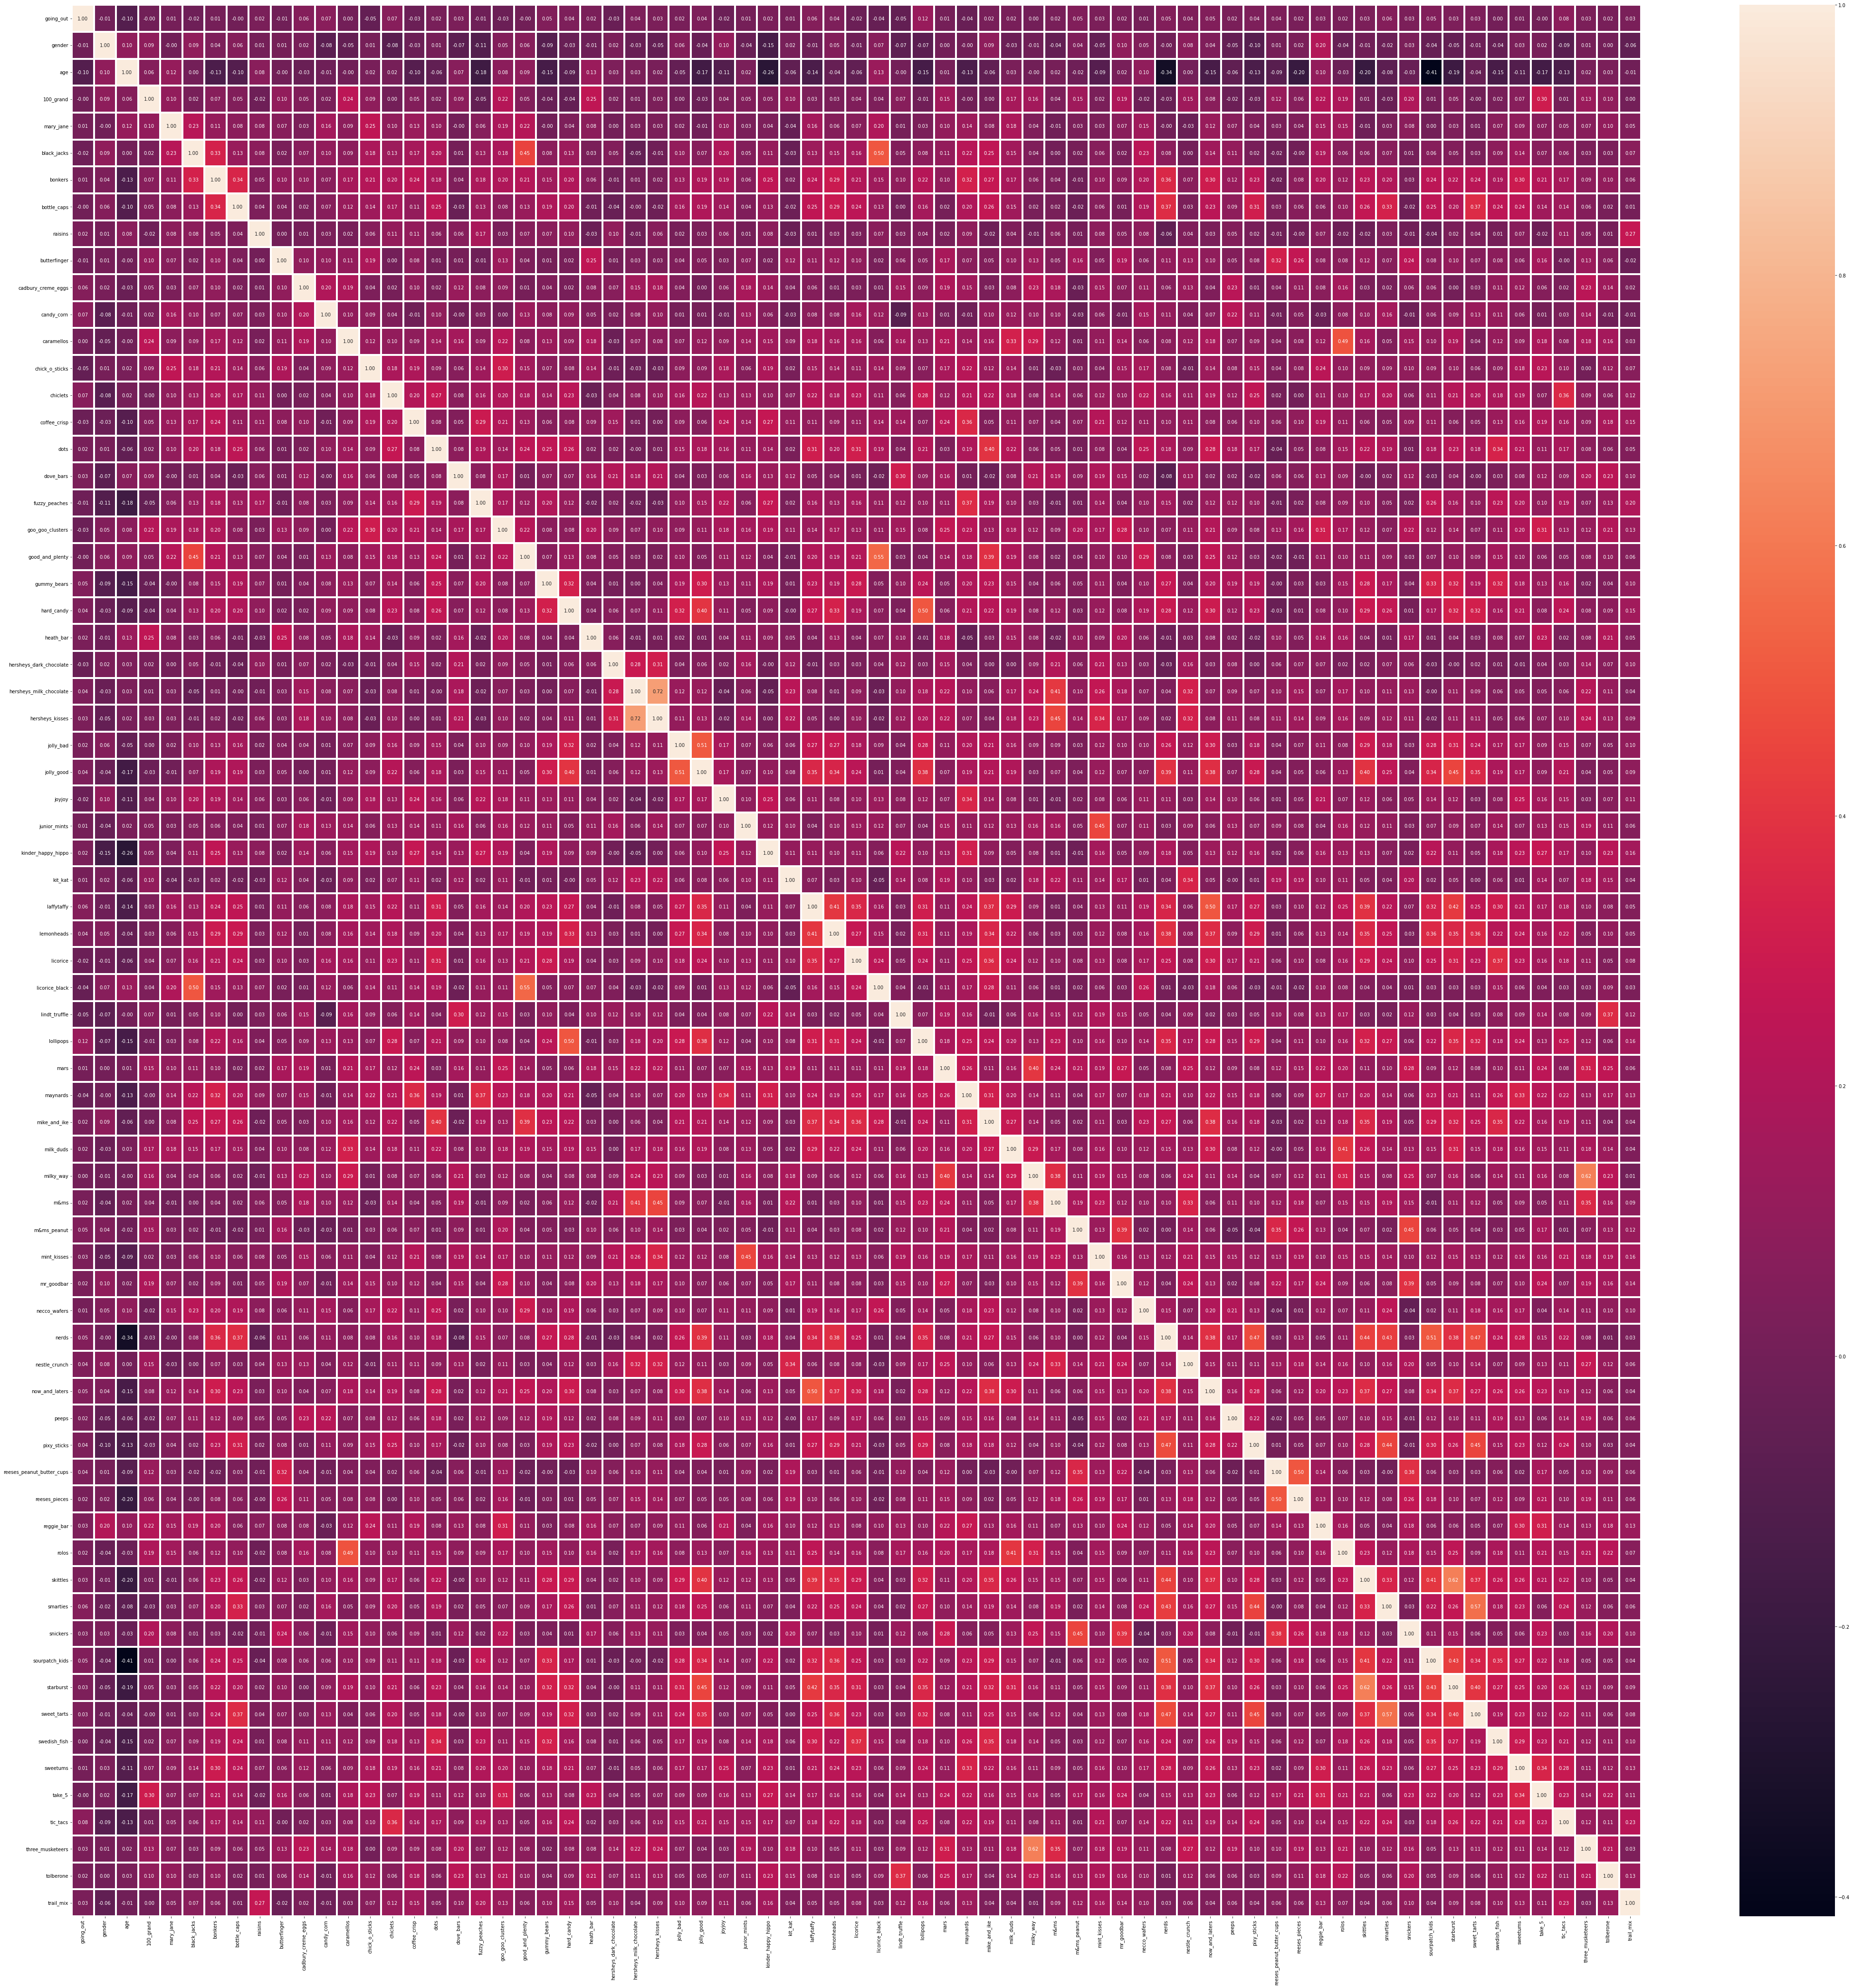

In [26]:
# heatmap
heatmap_df = clean_df.drop(['id','country', 'location', 'day'], axis = 1)
size = len(heatmap_df.columns)
f,ax = plt.subplots(figsize=(size, size))
sns.heatmap(heatmap_df.corr(), annot=True, linewidths=4, fmt= '.2f',ax=ax)

> The Correlation matrix and the Heatmap were actually very useful in finding similarities in what people liked. They also made a lot of sense:

- Hersheys kisses and Hersheys Milk Chocolate had the highest correlation. This makes sense due to the Brand and type of chocolate. Probably the most famous type of chocolate.
- Three Musketeers and Milky Way are both very popular chocolate bars, so if someone likes one, they will most likely like the other.
- We can see the same thing in with the next 2 highest. Skittles and Starburst are both fruity flavored candies. Sweet Tarts and Smarties are both sweet and tart candies.
- Black Licorice and Good and Plenty makes sense as well since Good and Plenty is literally Black Licorice. 
- It's also of note that something like Sourpatch Kids has a strong negative correlation with Age. It looks like as people get older they like sour candies less and less.

In [27]:
# Overall Correlation
corr_matrix = heatmap_df.corr().abs()
s = corr_matrix.unstack()
so = s.sort_values(kind="quicksort", ascending=False)
print(so[71:81:2])

hersheys_kisses   hersheys_milk_chocolate    0.723115
three_musketeers  milky_way                  0.622686
skittles          starburst                  0.620212
sweet_tarts       smarties                   0.572631
licorice_black    good_and_plenty            0.550075
dtype: float64


## Overall (all sexes and ages), which candies were liked and which were disliked?

- Like we saw before, Reeces Peanut Butter Cups is the overall most liked candy for all ages and genders.
- Raisins are the most hated, probably due to the fact that they're not a traditional candy.

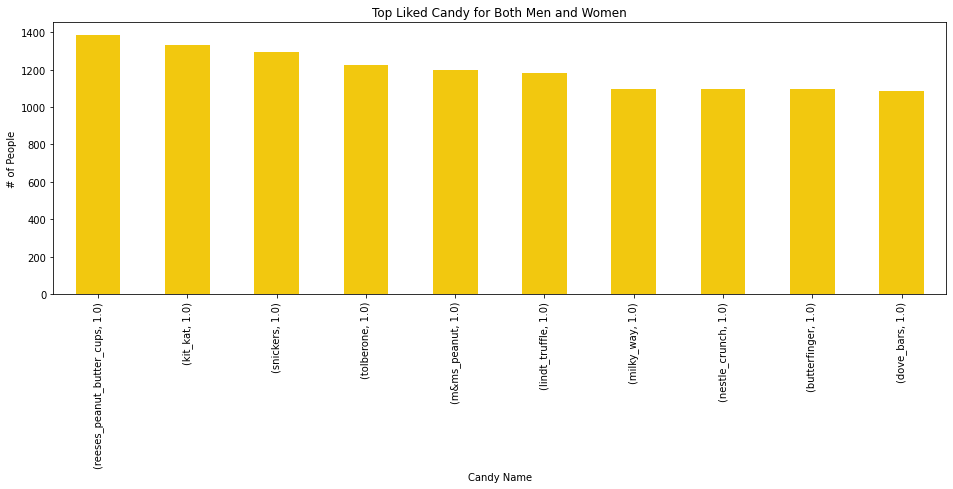

In [28]:
# Liked
df2 = clean_df.iloc[:, 6:-4]
df2 = df2.melt(value_vars=df2.columns)
df2 = df2[df2["value"] == 1]
fig, ax = plt.subplots(figsize=(16, 5))
df2.value_counts(ascending=True).nlargest(10).plot(kind="bar", color = "#F2C80F")
ax.set_title("Top Liked Candy for Both Men and Women")
ax.set_xlabel("Candy Name")
ax.set_ylabel("# of People")
plt.show()

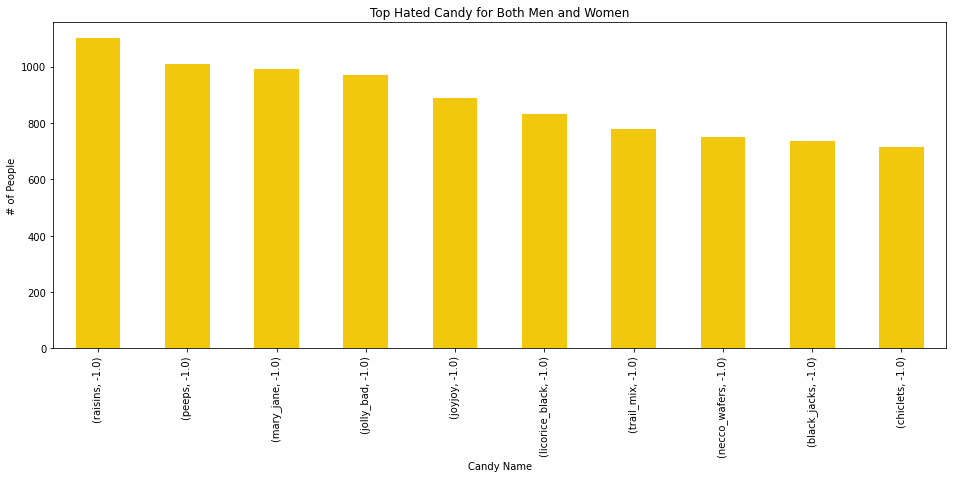

In [29]:
# Disliked
df2 = clean_df.iloc[:, 6:-4]
df2 = df2.melt(value_vars=df2.columns)
df2 = df2[df2["value"] == -1]
fig, ax = plt.subplots(figsize=(16, 6))
df2.value_counts(ascending=True).nlargest(10).plot(kind="bar", color = "#F2C80F")
ax.set_title("Top Hated Candy for Both Men and Women")
ax.set_xlabel("Candy Name")
ax.set_ylabel("# of People")
plt.show()

## Graphs based off of Gender

> Here I'm separating the 2 genders into their own datasets to better analyze and compare them.

In [30]:
# Need to make graphs based off of gender
female_df = clean_df.loc[clean_df['gender'] == 0,:]
male_df = clean_df.loc[clean_df['gender'] == 1,:]

> Both Males and Females like Reeces and Kit kats as their top 2, but differ slightly on the next candies.

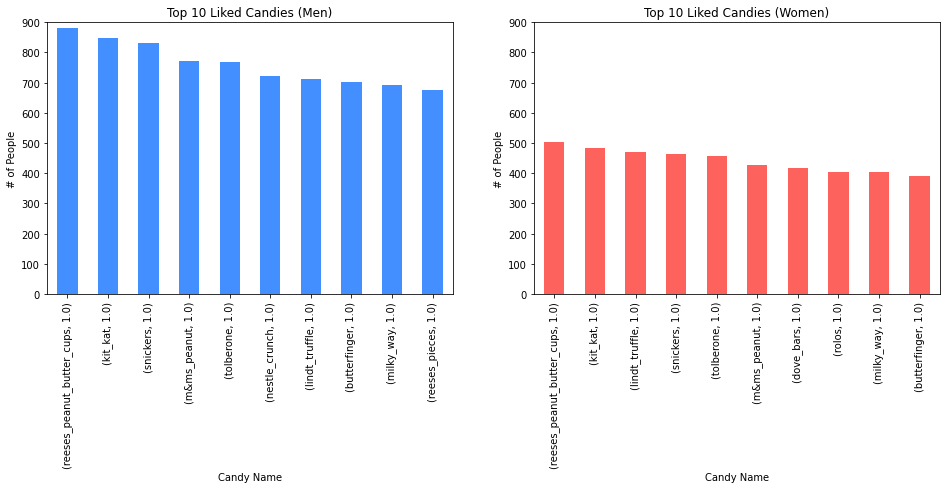

In [31]:
# Liked Based off Sex
mdf2 = male_df.iloc[:, 6:-4]
mdf2 = mdf2.melt(value_vars=mdf2.columns)
mdf2 = mdf2[mdf2["value"] == 1]

fdf2 = female_df.iloc[:, 6:-4]
fdf2 = fdf2.melt(value_vars=fdf2.columns)
fdf2 = fdf2[fdf2["value"] == 1]

plt.figure(figsize=(16,5))

plt.subplot(1, 2, 1)
mdf2.value_counts(ascending=True).nlargest(10).plot(kind="bar", color = "#438FFF")
plt.title("Top 10 Liked Candies (Men)")
plt.xlabel('Candy Name')
plt.ylabel('# of People')
plt.ylim([0, 900])

plt.subplot(1, 2, 2)
fdf2.value_counts(ascending=True).nlargest(10).plot(kind="bar", color = "#FD625D")
plt.title("Top 10 Liked Candies (Women)")
plt.xlabel('Candy Name')
plt.ylabel('# of People')
plt.ylim([0, 900])

plt.show()

> The top hated candy is also very similar between the 2, with raisins leading the way as most hated candy.

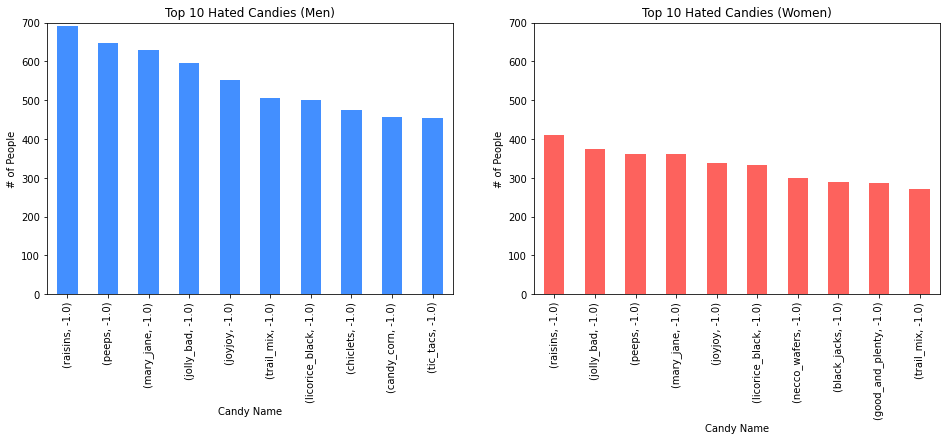

In [32]:
# Hated Based off gender
mdf2 = male_df.iloc[:, 6:-4]
mdf2 = mdf2.melt(value_vars=mdf2.columns)
mdf2 = mdf2[mdf2["value"] == -1]

fdf2 = female_df.iloc[:, 6:-4]
fdf2 = fdf2.melt(value_vars=fdf2.columns)
fdf2 = fdf2[fdf2["value"] == -1]

plt.figure(figsize=(16,5))

plt.subplot(1, 2, 1)
mdf2.value_counts(ascending=True).nlargest(10).plot(kind="bar", color = "#438FFF")
plt.title("Top 10 Hated Candies (Men)")
plt.xlabel('Candy Name')
plt.ylabel('# of People')
plt.ylim([0, 700])

plt.subplot(1, 2, 2)
fdf2.value_counts(ascending=True).nlargest(10).plot(kind="bar", color = "#FD625D")
plt.title("Top 10 Hated Candies (Women)")
plt.xlabel('Candy Name')
plt.ylabel('# of People')
plt.ylim([0, 700])

plt.show()

## Graphs based off of Age

> Here I separated the Ages into 7 different age ranges. These ranges are pretty typical for a lot of different studies.

> It was interesting to see that for the ages < 18, the top candy was Kit Kat, and Reeces wasn't even in the top 3.

> All other age ranges are about the same until > 65, whose favorite candy is a Dove Bar.

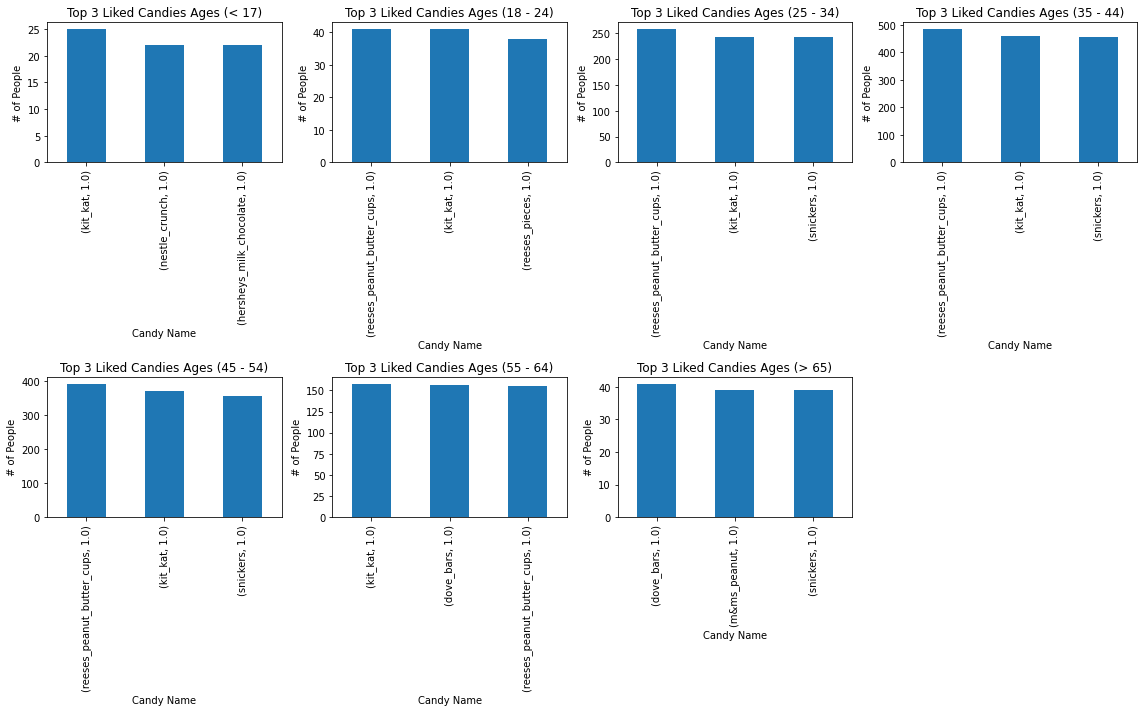

In [33]:
age_df1 = clean_df[clean_df['age'] <= 17].iloc[:, 6:-4]
age_df1 = age_df1.melt(value_vars=age_df1.columns)
age_df1 = age_df1[age_df1["value"] == 1]

age_df2 = clean_df[clean_df['age'] > 17]
age_df2 = age_df2[age_df2['age'] <= 24].iloc[:, 6:-4]
age_df2 = age_df2.melt(value_vars=age_df2.columns)
age_df2 = age_df2[age_df2["value"] == 1]

age_df3 = clean_df[clean_df['age'] > 24]
age_df3 = age_df3[age_df3['age'] <= 34].iloc[:, 6:-4]
age_df3 = age_df3.melt(value_vars=age_df3.columns)
age_df3 = age_df3[age_df3["value"] == 1]

age_df4 = clean_df[clean_df['age'] > 34]
age_df4 = age_df4[age_df4['age'] <= 44].iloc[:, 6:-4]
age_df4 = age_df4.melt(value_vars=age_df4.columns)
age_df4 = age_df4[age_df4["value"] == 1]

age_df5 = clean_df[clean_df['age'] > 44]
age_df5 = age_df5[age_df5['age'] <= 54].iloc[:, 6:-4]
age_df5 = age_df5.melt(value_vars=age_df5.columns)
age_df5 = age_df5[age_df5["value"] == 1]

age_df6 = clean_df[clean_df['age'] > 54]
age_df6 = age_df6[age_df6['age'] <= 64].iloc[:, 6:-4]
age_df6 = age_df6.melt(value_vars=age_df6.columns)
age_df6 = age_df6[age_df6["value"] == 1]

age_df7 = clean_df[clean_df['age'] > 64].iloc[:, 6:-4]
age_df7 = age_df7.melt(value_vars=age_df7.columns)
age_df7 = age_df7[age_df7["value"] == 1]


plt.figure(figsize=(16,10))

plt.subplot(2, 4, 1)
age_df1.value_counts(ascending=True).nlargest(3).plot(kind="bar")
plt.title("Top 3 Liked Candies Ages (< 17)")
plt.xlabel('Candy Name')
plt.ylabel('# of People')

plt.subplot(2, 4, 2)
age_df2.value_counts(ascending=True).nlargest(3).plot(kind="bar")
plt.title("Top 3 Liked Candies Ages (18 - 24)")
plt.xlabel('Candy Name')
plt.ylabel('# of People')

plt.subplot(2, 4, 3)
age_df3.value_counts(ascending=True).nlargest(3).plot(kind="bar")
plt.title("Top 3 Liked Candies Ages (25 - 34)")
plt.xlabel('Candy Name')
plt.ylabel('# of People')

plt.subplot(2, 4, 4)
age_df4.value_counts(ascending=True).nlargest(3).plot(kind="bar")
plt.title("Top 3 Liked Candies Ages (35 - 44)")
plt.xlabel('Candy Name')
plt.ylabel('# of People')

plt.subplot(2, 4, 5)
age_df5.value_counts(ascending=True).nlargest(3).plot(kind="bar")
plt.title("Top 3 Liked Candies Ages (45 - 54)")
plt.xlabel('Candy Name')
plt.ylabel('# of People')

plt.subplot(2, 4, 6)
age_df6.value_counts(ascending=True).nlargest(3).plot(kind="bar")
plt.title("Top 3 Liked Candies Ages (55 - 64)")
plt.xlabel('Candy Name')
plt.ylabel('# of People')

plt.subplot(2, 4, 7)
age_df7.value_counts(ascending=True).nlargest(3).plot(kind="bar")
plt.title("Top 3 Liked Candies Ages (> 65)")
plt.xlabel('Candy Name')
plt.ylabel('# of People')

plt.tight_layout()

plt.show()

> Like before we see Raisins leading the way as most Hated candy in the first 5 age groups. For the last 2 age groups they seem to dislike Jolly Rancher flavors to most.

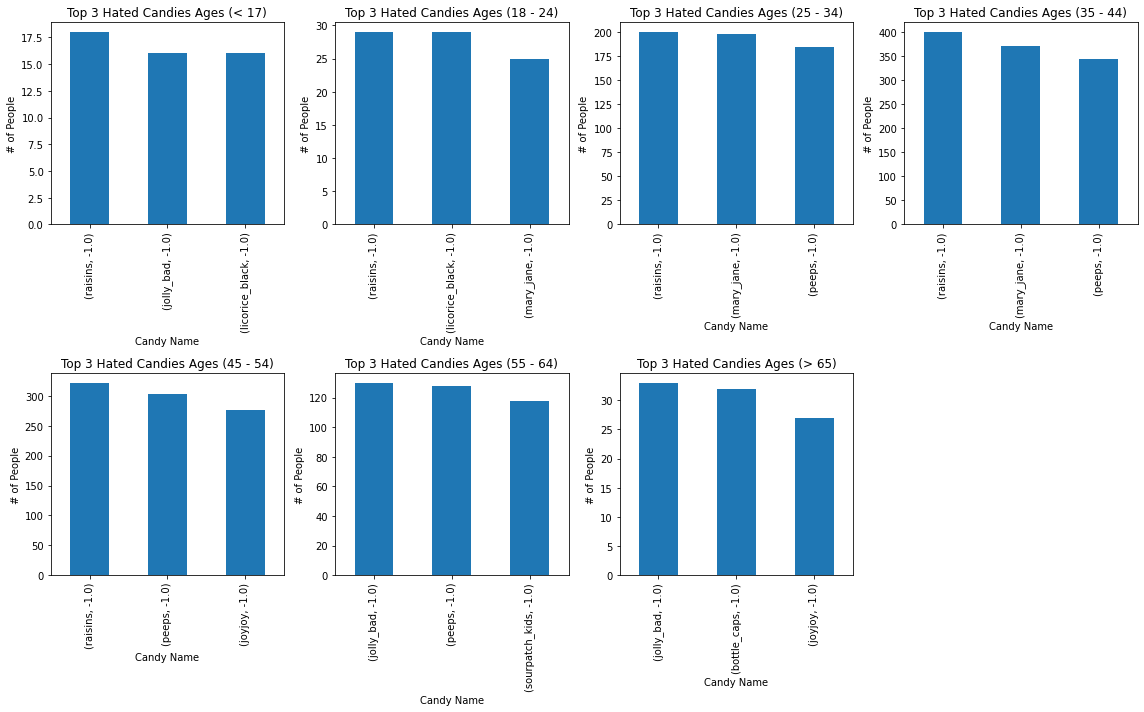

In [34]:
age_df1 = clean_df[clean_df['age'] <= 17].iloc[:, 6:-4]
age_df1 = age_df1.melt(value_vars=age_df1.columns)
age_df1 = age_df1[age_df1["value"] == -1]

age_df2 = clean_df[clean_df['age'] > 17]
age_df2 = age_df2[age_df2['age'] <= 24].iloc[:, 6:-4]
age_df2 = age_df2.melt(value_vars=age_df2.columns)
age_df2 = age_df2[age_df2["value"] == -1]

age_df3 = clean_df[clean_df['age'] > 24]
age_df3 = age_df3[age_df3['age'] <= 34].iloc[:, 6:-4]
age_df3 = age_df3.melt(value_vars=age_df3.columns)
age_df3 = age_df3[age_df3["value"] == -1]

age_df4 = clean_df[clean_df['age'] > 34]
age_df4 = age_df4[age_df4['age'] <= 44].iloc[:, 6:-4]
age_df4 = age_df4.melt(value_vars=age_df4.columns)
age_df4 = age_df4[age_df4["value"] == -1]

age_df5 = clean_df[clean_df['age'] > 44]
age_df5 = age_df5[age_df5['age'] <= 54].iloc[:, 6:-4]
age_df5 = age_df5.melt(value_vars=age_df5.columns)
age_df5 = age_df5[age_df5["value"] == -1]

age_df6 = clean_df[clean_df['age'] > 54]
age_df6 = age_df6[age_df6['age'] <= 64].iloc[:, 6:-4]
age_df6 = age_df6.melt(value_vars=age_df6.columns)
age_df6 = age_df6[age_df6["value"] == -1]

age_df7 = clean_df[clean_df['age'] > 64].iloc[:, 6:-4]
age_df7 = age_df7.melt(value_vars=age_df7.columns)
age_df7 = age_df7[age_df7["value"] == -1]


plt.figure(figsize=(16,10))

plt.subplot(2, 4, 1)
age_df1.value_counts(ascending=True).nlargest(3).plot(kind="bar")
plt.title("Top 3 Hated Candies Ages (< 17)")
plt.xlabel('Candy Name')
plt.ylabel('# of People')

plt.subplot(2, 4, 2)
age_df2.value_counts(ascending=True).nlargest(3).plot(kind="bar")
plt.title("Top 3 Hated Candies Ages (18 - 24)")
plt.xlabel('Candy Name')
plt.ylabel('# of People')

plt.subplot(2, 4, 3)
age_df3.value_counts(ascending=True).nlargest(3).plot(kind="bar")
plt.title("Top 3 Hated Candies Ages (25 - 34)")
plt.xlabel('Candy Name')
plt.ylabel('# of People')

plt.subplot(2, 4, 4)
age_df4.value_counts(ascending=True).nlargest(3).plot(kind="bar")
plt.title("Top 3 Hated Candies Ages (35 - 44)")
plt.xlabel('Candy Name')
plt.ylabel('# of People')

plt.subplot(2, 4, 5)
age_df5.value_counts(ascending=True).nlargest(3).plot(kind="bar")
plt.title("Top 3 Hated Candies Ages (45 - 54)")
plt.xlabel('Candy Name')
plt.ylabel('# of People')

plt.subplot(2, 4, 6)
age_df6.value_counts(ascending=True).nlargest(3).plot(kind="bar")
plt.title("Top 3 Hated Candies Ages (55 - 64)")
plt.xlabel('Candy Name')
plt.ylabel('# of People')

plt.subplot(2, 4, 7)
age_df7.value_counts(ascending=True).nlargest(3).plot(kind="bar")
plt.title("Top 3 Hated Candies Ages (> 65)")
plt.xlabel('Candy Name')
plt.ylabel('# of People')

plt.tight_layout()

plt.show() 